In [1]:
import torch
import torch.optim as optim

from random import randint
import matplotlib.pyplot as plt

#### Объясление функции модели

In [2]:
def model(X, w):
    """обычная линейная модель"""
    return X @ w

#### Подготовка датасета

In [3]:
N = 2
w = torch.FloatTensor(N).uniform_(-1e-5, 1e-5)  # создание случайных весовых коэффициентов
w.requires_grad_(True)  # потому что нам надо будет считать градиенты
x = torch.arange(0, 3, 0.1)

In [4]:
y_train = 0.5 * x + 0.2 * torch.sin(2*x) - 3.0  # функция, которую будем аппроксимировать
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])  # потому что у нас еще есть bais

#### Задание параметров обучения

In [5]:
total = len(x)
lr = torch.tensor([0.1, 0.01])
loss_func = torch.nn.L1Loss()  # функция потерь
optimizer = optim.Adam(params=[w], lr=0.01)  # оптимизатор

#### Обучение

In [6]:
for _ in range(1000):
    k = randint(0, total-1)
    y = model(x_train[k], w) 
    loss = loss_func(y, y_train[k])

    loss.backward()  # вычисляем производные (градиент)
    # w.data = w.data - lr * w.grad
    # w.grad.zero_()
    optimizer.step()
    optimizer.zero_grad()  # для обнуления градиентов в графе

#### Оценка обучения

In [11]:
print(f'Веса после обучения: {w}')
predict = model(x_train, w)
final_loss = loss_func(predict, y)
print(f'Средний эмпирический риск: {final_loss}')

Веса после обучения: tensor([-2.7639,  0.3779], requires_grad=True)
Средний эмпирический риск: 0.2978578507900238


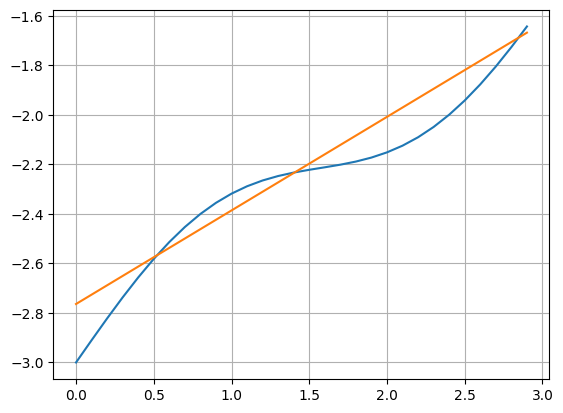

In [12]:
plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()